In [ ]:
# 1. Data Cleaning: Ensure proper data types by converting values into the required formats and adding necessary columns.
# 2. Data Visualization: Conduct univariate, bivariate, and multivariate analyses.
# 3. Handling Missing Data: Provide proper justification for each column by visualizing the effects before and after handling missing data.
# 4. Standardization and Normalization of Data: Justify the need for these processes with visualizations showing effects before and after.
# 5. Handling Outliers
# 6. Encoding -- (categorical data was absent)

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Merging necessary columns**


In [77]:
#retriving example files for column details
aaod = pd.read_csv("/content/drive/MyDrive/aerosol/data3sites/iitdelhi_aaod.csv")
eaod = pd.read_csv("/content/drive/MyDrive/aerosol/data3sites/iitdelhi_eaod.csv")
ssa = pd.read_csv("/content/drive/MyDrive/aerosol/data3sites/iitdelhi_ssa.csv")
ri = pd.read_csv("/content/drive/MyDrive/aerosol/data3sites/iitdelhi_ri.csv")

In [78]:
aaod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 45 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Site                                                       1503 non-null   object 
 1   Date(dd:mm:yyyy)                                           1503 non-null   object 
 2   Time(hh:mm:ss)                                             1503 non-null   object 
 3   Day_of_Year                                                1503 non-null   int64  
 4   Day_of_Year(Fraction)                                      1503 non-null   float64
 5   Absorption_AOD[440nm]                                      1503 non-null   float64
 6   Absorption_AOD[675nm]                                      1503 non-null   float64
 7   Absorption_AOD[870nm]                                      1503 non-null   float64
 8   Absorpti

In [79]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 48 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Site                                                       1503 non-null   object 
 1   Date(dd:mm:yyyy)                                           1503 non-null   object 
 2   Time(hh:mm:ss)                                             1503 non-null   object 
 3   Day_of_Year                                                1503 non-null   int64  
 4   Day_of_Year(Fraction)                                      1503 non-null   float64
 5   Refractive_Index-Real_Part[440nm]                          1503 non-null   float64
 6   Refractive_Index-Real_Part[675nm]                          1503 non-null   float64
 7   Refractive_Index-Real_Part[870nm]                          1503 non-null   float64
 8   Refracti

In [80]:
ssa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Site                                                       1503 non-null   object 
 1   Date(dd:mm:yyyy)                                           1503 non-null   object 
 2   Time(hh:mm:ss)                                             1503 non-null   object 
 3   Day_of_Year                                                1503 non-null   int64  
 4   Day_of_Year(Fraction)                                      1503 non-null   float64
 5   Single_Scattering_Albedo[440nm]                            1503 non-null   float64
 6   Single_Scattering_Albedo[675nm]                            1503 non-null   float64
 7   Single_Scattering_Albedo[870nm]                            1503 non-null   float64
 8   Single_S

In [81]:
eaod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 53 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Site                                                       1503 non-null   object 
 1   Date(dd:mm:yyyy)                                           1503 non-null   object 
 2   Time(hh:mm:ss)                                             1503 non-null   object 
 3   Day_of_Year                                                1503 non-null   int64  
 4   Day_of_Year(Fraction)                                      1503 non-null   float64
 5   AOD_Extinction-Total[440nm]                                1503 non-null   float64
 6   AOD_Extinction-Total[675nm]                                1503 non-null   float64
 7   AOD_Extinction-Total[870nm]                                1503 non-null   float64
 8   AOD_Exti

In [82]:
#fxn to merge necessary cols for each aeronet ground station
import pandas as pd

def merge_req(site_name):
    #read
    eaod = pd.read_csv(f"/content/drive/MyDrive/aerosol/data3sites/{site_name}_eaod.csv")
    ssa = pd.read_csv(f"/content/drive/MyDrive/aerosol/data3sites/{site_name}_ssa.csv")
    aaod = pd.read_csv(f"/content/drive/MyDrive/aerosol/data3sites/{site_name}_aaod.csv")
    ri = pd.read_csv(f"/content/drive/MyDrive/aerosol/data3sites/{site_name}_ri.csv")

    #extracting  req cols
    aerosol = eaod.iloc[:, 0:18]
    ssa_selected = ssa[['Single_Scattering_Albedo[440nm]', 'Single_Scattering_Albedo[675nm]',
                         'Single_Scattering_Albedo[870nm]', 'Single_Scattering_Albedo[1020nm]']]
    aaod_selected = aaod[['Absorption_AOD[440nm]', 'Absorption_AOD[675nm]', 'Absorption_AOD[870nm]',
                           'Absorption_AOD[1020nm]', 'Absorption_Angstrom_Exponent_440-870nm']]
    ri_selected = ri[['Refractive_Index-Real_Part[440nm]', 'Refractive_Index-Real_Part[675nm]',
                      'Refractive_Index-Real_Part[870nm]', 'Refractive_Index-Real_Part[1020nm]',
                      'Refractive_Index-Imaginary_Part[440nm]', 'Refractive_Index-Imaginary_Part[675nm]',
                      'Refractive_Index-Imaginary_Part[870nm]', 'Refractive_Index-Imaginary_Part[1020nm]']]

    #merge
    df = aerosol.merge(ssa_selected, left_index=True, right_index=True)
    df = df.merge(aaod_selected, left_index=True, right_index=True)
    df = df.merge(ri_selected, left_index=True, right_index=True)

    return df




In [83]:
# seperate df for each site
kanpur_para = merge_req("kanpur")
iitdelhi_para = merge_req("iitdelhi")
pune_para = merge_req("pune")

In [85]:
# concating data from all sites
aerosol = pd.concat([kanpur_para, iitdelhi_para, pune_para], ignore_index=True)

# **EDA**

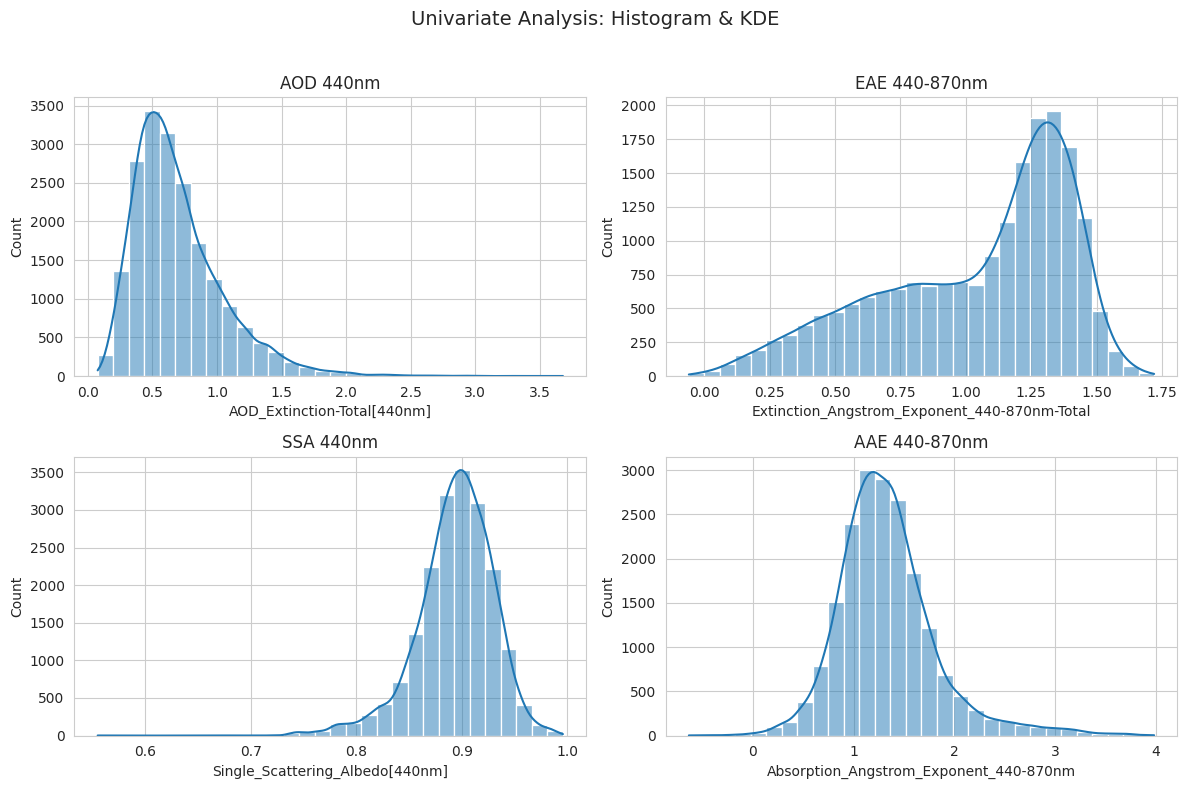

In [161]:
#kde and hist
col_titles = {
    "AOD_Extinction-Total[440nm]": "AOD 440nm",
    "Extinction_Angstrom_Exponent_440-870nm-Total": "EAE 440-870nm",
    "Single_Scattering_Albedo[440nm]": "SSA 440nm",
    "Absorption_Angstrom_Exponent_440-870nm": "AAE 440-870nm"
}

uni = list(col_titles.keys())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Univariate Analysis: Histogram & KDE", fontsize=14)

for idx, col in enumerate(uni):
    ax = axes[idx // 2, idx % 2]
    sns.histplot(aerosol[col], kde=True, bins=30, ax=ax)
    ax.set_title(col_titles[col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 1200x600 with 0 Axes>

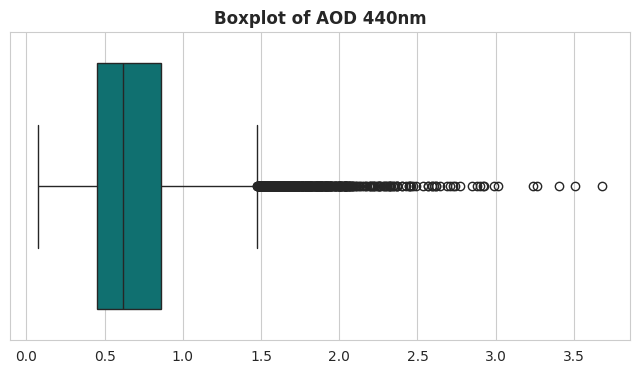

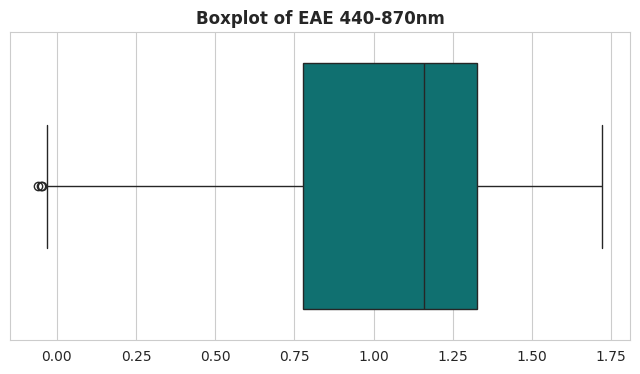

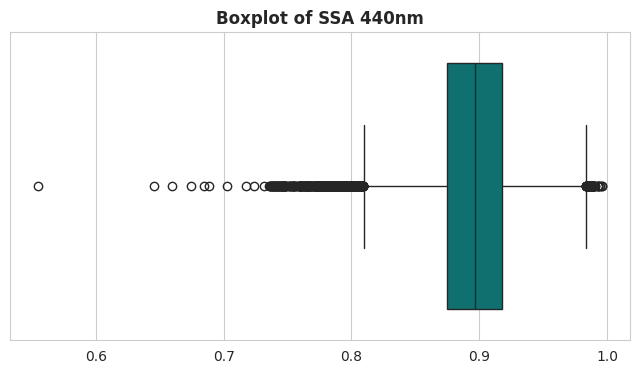

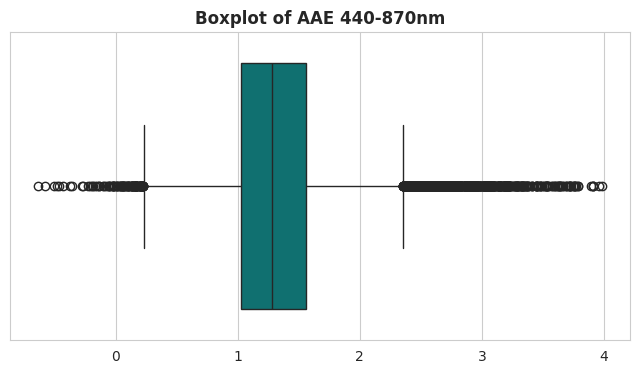

In [166]:
#box plot
selected_cols = ["AOD_Extinction-Total[440nm]", "Extinction_Angstrom_Exponent_440-870nm-Total",
                 "Single_Scattering_Albedo[440nm]", "Absorption_Angstrom_Exponent_440-870nm"]

titles = ["AOD 440nm", "EAE 440-870nm", "SSA 440nm", "AAE 440-870nm"]

plt.figure(figsize=(12, 6))
plt.suptitle("Univariate Analysis: Boxplots", fontsize=14, fontweight="bold", color="darkblue")

for col, title in zip(selected_cols, titles):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=aerosol[col], color="teal")
    plt.title(f"Boxplot of {title}", fontsize=12, fontweight="bold")
    plt.xlabel("")
    plt.show()

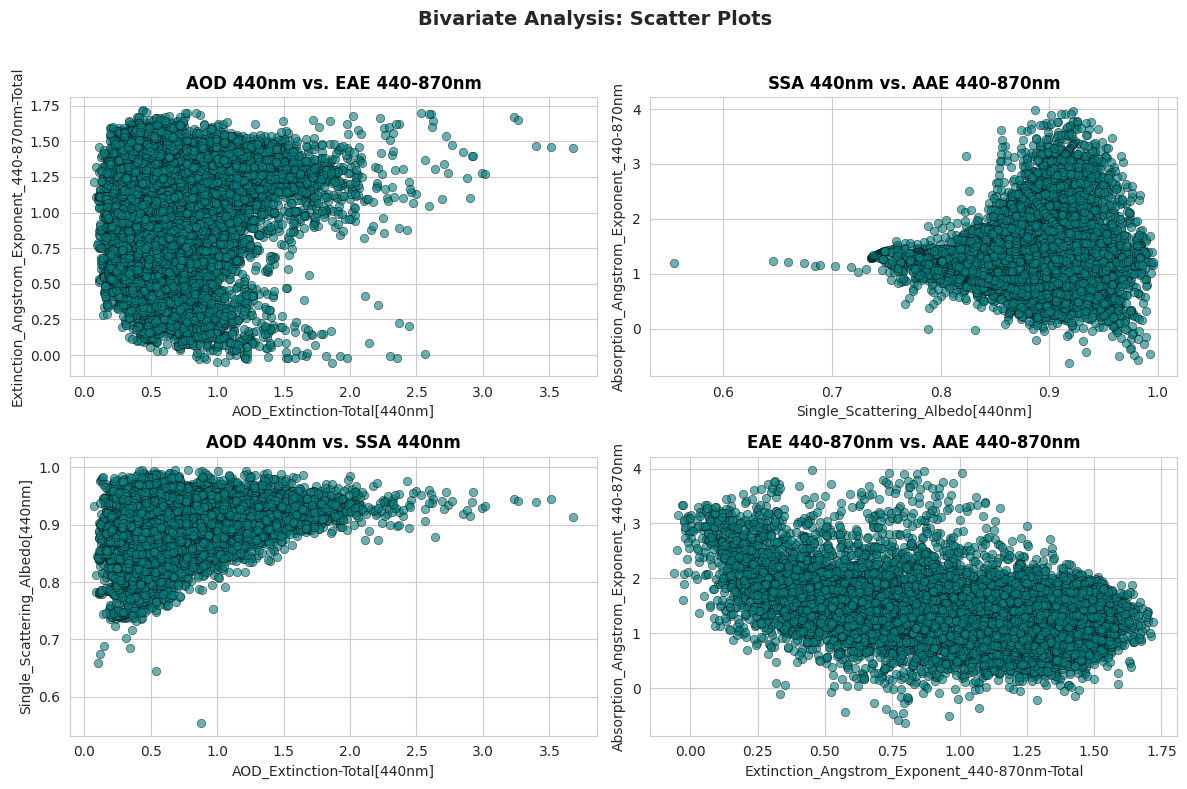

In [170]:
#bivariate scatterplot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Bivariate Analysis: Scatter Plots", fontsize=14, fontweight="bold")

bivariate_pairs = [
    ("AOD_Extinction-Total[440nm]", "Extinction_Angstrom_Exponent_440-870nm-Total"),
    ("Single_Scattering_Albedo[440nm]", "Absorption_Angstrom_Exponent_440-870nm"),
    ("AOD_Extinction-Total[440nm]", "Single_Scattering_Albedo[440nm]"),
    ("Extinction_Angstrom_Exponent_440-870nm-Total", "Absorption_Angstrom_Exponent_440-870nm")
]

titles = [
    "AOD 440nm vs. EAE 440-870nm",
    "SSA 440nm vs. AAE 440-870nm",
    "AOD 440nm vs. SSA 440nm",
    "EAE 440-870nm vs. AAE 440-870nm"
]

for idx, ((x_col, y_col), title) in enumerate(zip(bivariate_pairs, titles)):
    ax = axes[idx // 2, idx % 2]
    sns.scatterplot(data=aerosol, x=x_col, y=y_col, alpha=0.6, color="teal", edgecolor="black", ax=ax)
    ax.set_title(title, fontsize=12, fontweight="bold", color="black")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




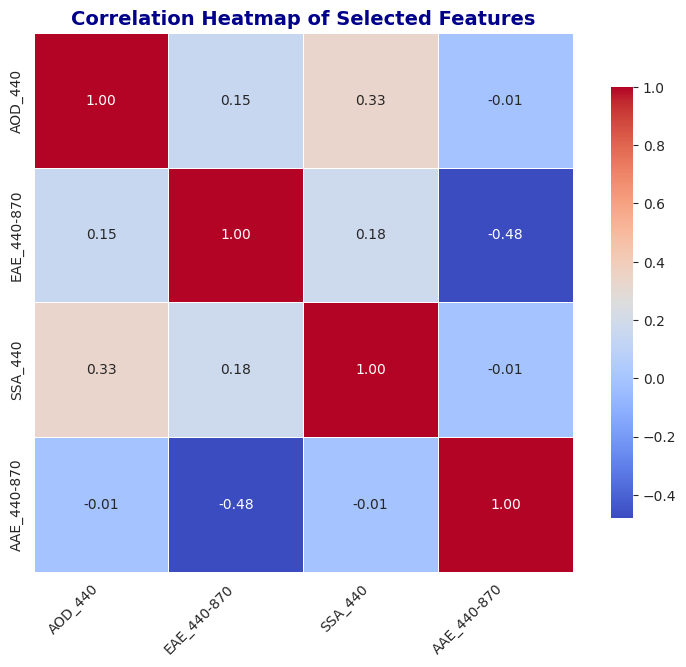

In [169]:
#correlation heatmap
short_labels = {
    "AOD_Extinction-Total[440nm]": "AOD_440",
    "Extinction_Angstrom_Exponent_440-870nm-Total": "EAE_440-870",
    "Single_Scattering_Albedo[440nm]": "SSA_440",
    "Absorption_Angstrom_Exponent_440-870nm": "AAE_440-870"
}

corr_data = aerosol[univariate_cols].rename(columns=short_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Selected Features", fontsize=14, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.show()


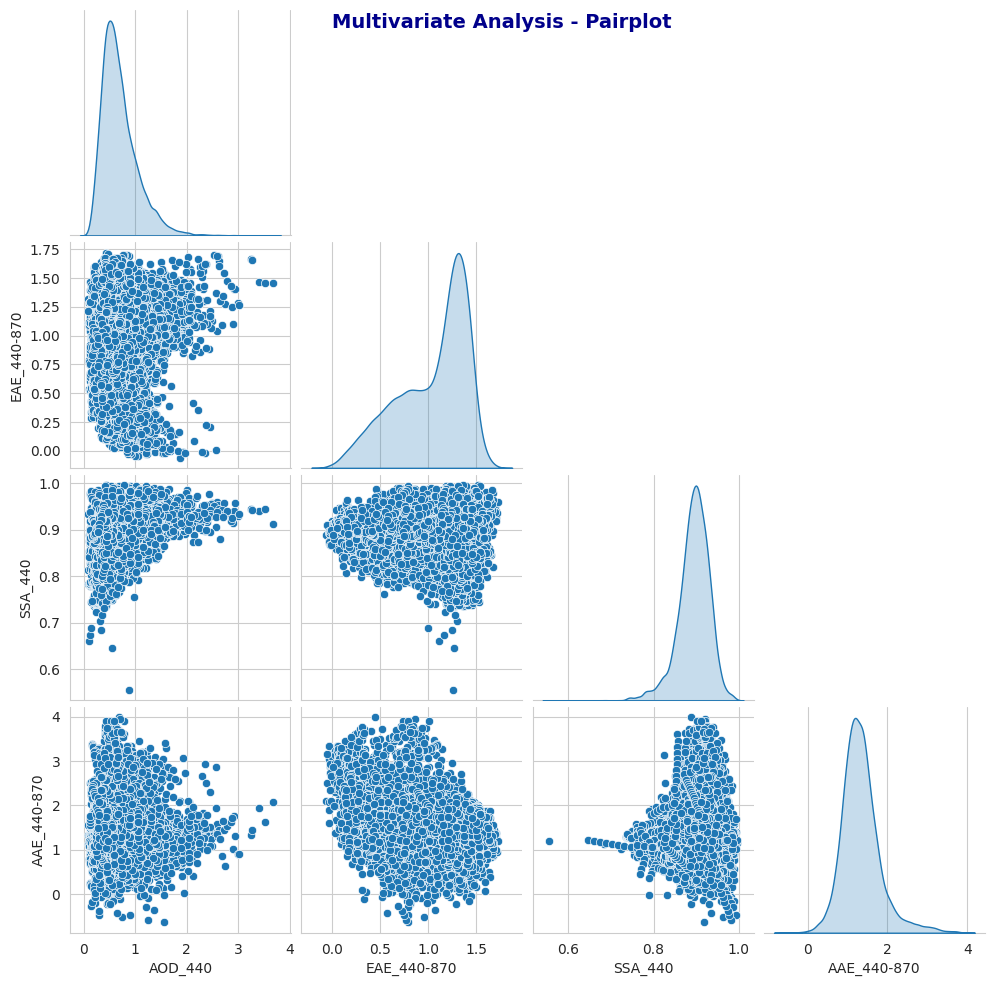

In [172]:
# pairplot
corr_data = aerosol[univariate_cols].rename(columns=short_labels)
pairplot = sns.pairplot(corr_data, diag_kind="kde", corner=True)
pairplot.fig.suptitle("Multivariate Analysis - Pairplot", fontsize=14, fontweight="bold", color="darkblue")

plt.show()


# **Handling Missing Data**

In [87]:
aerosol_ori= aerosol.copy()

In [88]:
aerosol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19272 entries, 0 to 19271
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Site                                          19272 non-null  object 
 1   Date(dd:mm:yyyy)                              19272 non-null  object 
 2   Time(hh:mm:ss)                                19272 non-null  object 
 3   Day_of_Year                                   19272 non-null  int64  
 4   Day_of_Year(Fraction)                         19272 non-null  float64
 5   AOD_Extinction-Total[440nm]                   19272 non-null  float64
 6   AOD_Extinction-Total[675nm]                   19272 non-null  float64
 7   AOD_Extinction-Total[870nm]                   19272 non-null  float64
 8   AOD_Extinction-Total[1020nm]                  19272 non-null  float64
 9   AOD_Extinction-Fine[440nm]                    19272 non-null 

In [89]:
aerosol.shape

(19272, 35)

In [90]:
aerosol.replace(-999, np.nan, inplace=True)
aerosol.isnull().mean()*100

,0
Site,0.000000
Date(dd:mm:yyyy),0.000000
Time(hh:mm:ss),0.000000
Day_of_Year,0.000000
Day_of_Year(Fraction),0.000000
AOD_Extinction-Total[440nm],0.000000
AOD_Extinction-Total[675nm],0.000000
AOD_Extinction-Total[870nm],0.000000
AOD_Extinction-Total[1020nm],0.000000
AOD_Extinction-Fine[440nm],0.000000


In [91]:
# Select three columns for imputation
cols_to_impute = [
    "Single_Scattering_Albedo[440nm]",
    "Absorption_AOD[440nm]",
    "Refractive_Index-Real_Part[440nm]"
]

# Create new columns for mean and median imputation
for col in cols_to_impute:
    aerosol[f"{col}_Mean_Imputed"] = aerosol[col].fillna(aerosol[col].mean())
    aerosol[f"{col}_Median_Imputed"] = aerosol[col].fillna(aerosol[col].median())

Variance before and after imputation

In [92]:
for col in cols_to_impute:
    print(f"Original {col} variance: ", aerosol[col].var())
    print(f"{col} variance after median imputation: ",aerosol[f"{col}_Median_Imputed"].var())
    print(f"{col} variance after mean imputation: ",aerosol[f"{col}_Mean_Imputed"].var())
    print()


Original Single_Scattering_Albedo[440nm] variance:  0.0011474646488446373
Single_Scattering_Albedo[440nm] variance after median imputation:  0.0009395133449931189
Single_Scattering_Albedo[440nm] variance after mean imputation:  0.0009388238865826036

Original Absorption_AOD[440nm] variance:  0.001013680590602932
Absorption_AOD[440nm] variance after median imputation:  0.0008335895710885455
Absorption_AOD[440nm] variance after mean imputation:  0.00082936546479355

Original Refractive_Index-Real_Part[440nm] variance:  0.0034153743724446494
Refractive_Index-Real_Part[440nm] variance after median imputation:  0.0027944349774415016
Refractive_Index-Real_Part[440nm] variance after mean imputation:  0.00279436499041739



KDE

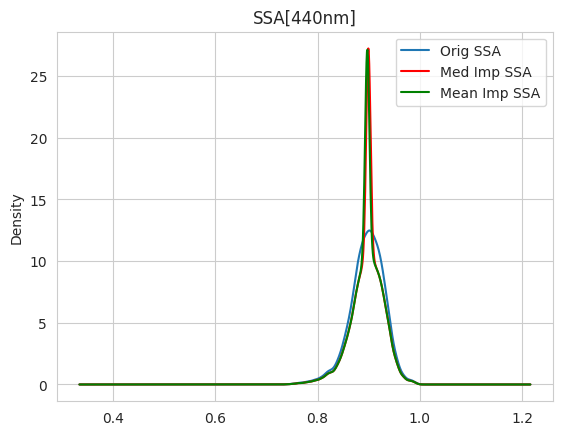

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)

aerosol["Single_Scattering_Albedo[440nm]"].plot(kind='kde', ax=ax, label='Orig SSA')
aerosol["Single_Scattering_Albedo[440nm]_Median_Imputed"].plot(kind='kde', ax=ax, color='red', label='Med Imp SSA')
aerosol["Single_Scattering_Albedo[440nm]_Mean_Imputed"].plot(kind='kde', ax=ax, color='green', label='Mean Imp SSA')

ax.legend(loc='best')
plt.title('SSA[440nm]')
plt.show()


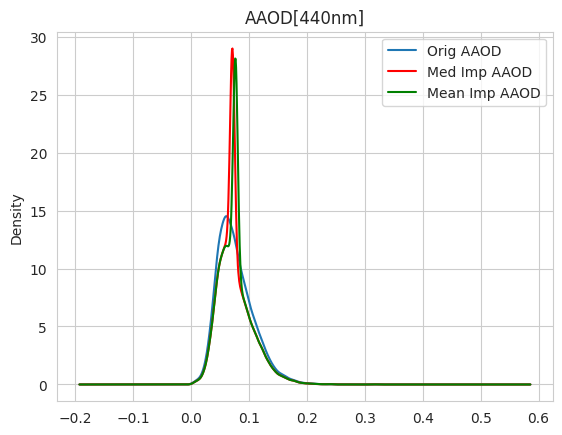

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111)

aerosol["Absorption_AOD[440nm]"].plot(kind='kde', ax=ax, label='Orig AAOD')
aerosol["Absorption_AOD[440nm]_Median_Imputed"].plot(kind='kde', ax=ax, color='red', label='Med Imp AAOD')
aerosol["Absorption_AOD[440nm]_Mean_Imputed"].plot(kind='kde', ax=ax, color='green', label='Mean Imp AAOD')

ax.legend(loc='best')
plt.title('AAOD[440nm]')
plt.show()


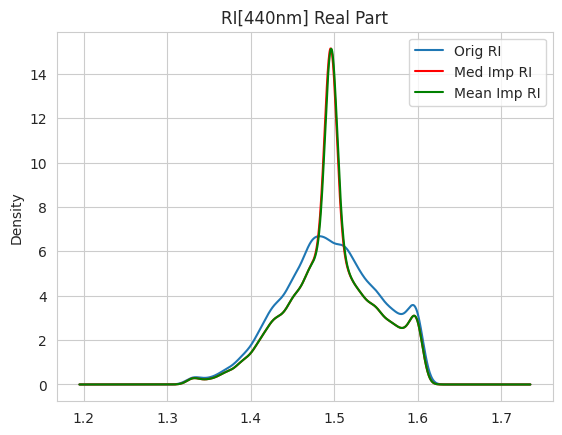

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)

aerosol["Refractive_Index-Real_Part[440nm]"].plot(kind='kde', ax=ax, label='Orig RI')
aerosol["Refractive_Index-Real_Part[440nm]_Median_Imputed"].plot(kind='kde', ax=ax, color='red', label='Med Imp RI')
aerosol["Refractive_Index-Real_Part[440nm]_Mean_Imputed"].plot(kind='kde', ax=ax, color='green', label='Mean Imp RI')

ax.legend(loc='best')
plt.title('RI[440nm] Real Part')
plt.show()


Boxplot


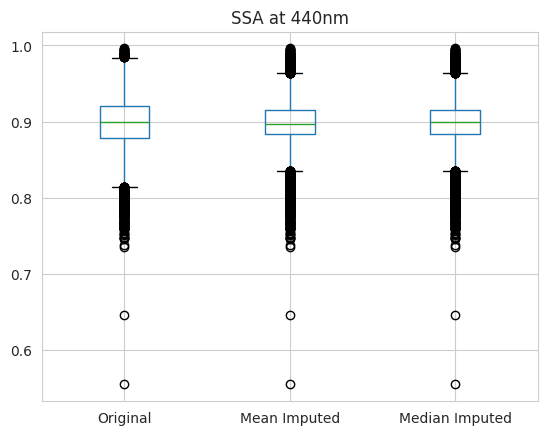

In [96]:
ax = aerosol[["Single_Scattering_Albedo[440nm]", "Single_Scattering_Albedo[440nm]_Mean_Imputed", "Single_Scattering_Albedo[440nm]_Median_Imputed"]].boxplot()
ax.set_xticklabels(["Original", "Mean Imputed", "Median Imputed"])
plt.title("SSA at 440nm")
plt.show()


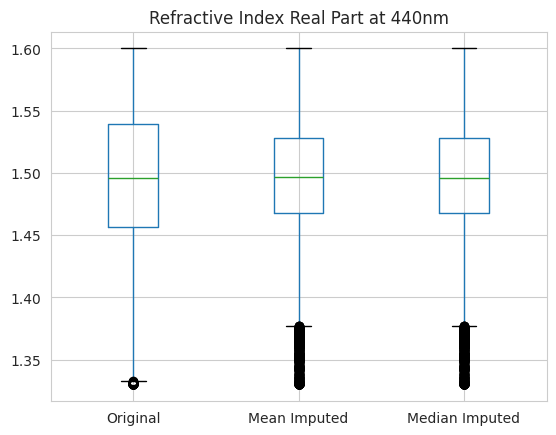

In [97]:
ax = aerosol[["Refractive_Index-Real_Part[440nm]", "Refractive_Index-Real_Part[440nm]_Mean_Imputed", "Refractive_Index-Real_Part[440nm]_Median_Imputed"]].boxplot()
ax.set_xticklabels(["Original", "Mean Imputed", "Median Imputed"])
plt.title("Refractive Index Real Part at 440nm")
plt.show()

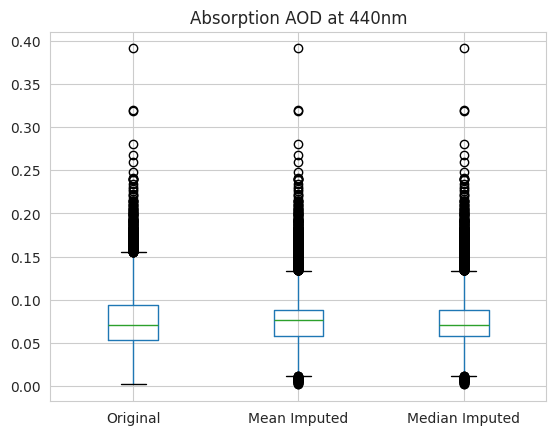

In [98]:
ax = aerosol[["Absorption_AOD[440nm]", "Absorption_AOD[440nm]_Mean_Imputed", "Absorption_AOD[440nm]_Median_Imputed"]].boxplot()
ax.set_xticklabels(["Original", "Mean Imputed", "Median Imputed"])
plt.title("Absorption AOD at 440nm")
plt.show()

**We aren't using mean and median imputation as they distort the distribution and increase outliers.**

In [99]:
aerosol_ori.replace(-999, np.nan, inplace=True)

In [100]:
aerosol_ori.to_csv("/content/drive/MyDrive/aerosol/data3sites/aerosol_ori.csv", index=False)


In [101]:
aerosol.isna().sum()

,0
Site,0
Date(dd:mm:yyyy),0
Time(hh:mm:ss),0
Day_of_Year,0
Day_of_Year(Fraction),0
AOD_Extinction-Total[440nm],0
AOD_Extinction-Total[675nm],0
AOD_Extinction-Total[870nm],0
AOD_Extinction-Total[1020nm],0
AOD_Extinction-Fine[440nm],0


In [102]:
aerosol["Absorption_AOD[440nm]_FFill"] = aerosol["Absorption_AOD[440nm]"].fillna(method='ffill')


<ipython-input-102-123d754e4d42>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aerosol["Absorption_AOD[440nm]_FFill"] = aerosol["Absorption_AOD[440nm]"].fillna(method='ffill')


In [103]:
aerosol["Absorption_AOD[440nm]_BFill"] = aerosol["Absorption_AOD[440nm]"].fillna(method='bfill')


<ipython-input-103-e32727e5a8c4>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aerosol["Absorption_AOD[440nm]_BFill"] = aerosol["Absorption_AOD[440nm]"].fillna(method='bfill')


In [104]:
aerosol["Absorption_AOD[440nm]_Interpolated"] = aerosol["Absorption_AOD[440nm]"].interpolate()


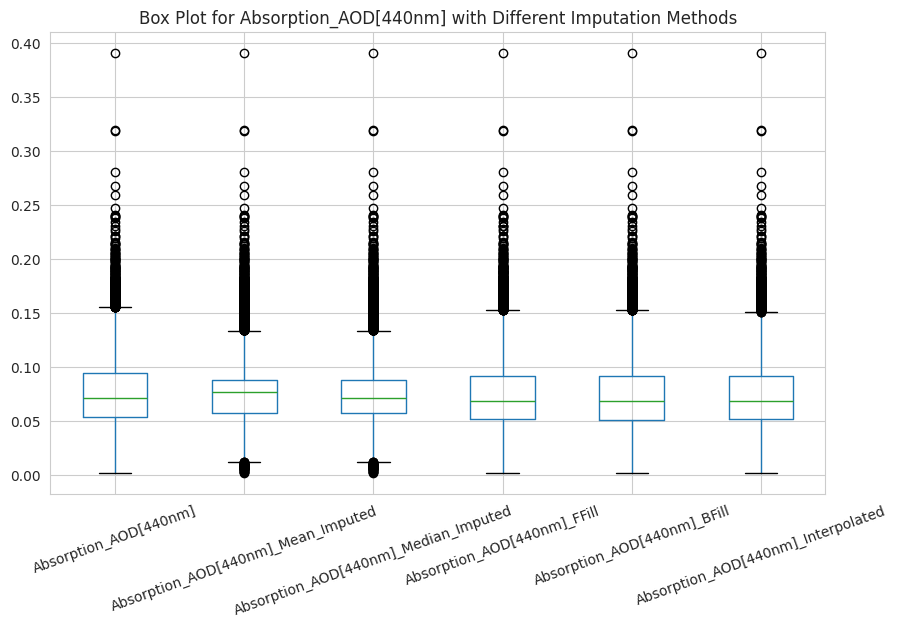

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
aerosol[["Absorption_AOD[440nm]",
         "Absorption_AOD[440nm]_Mean_Imputed",
         "Absorption_AOD[440nm]_Median_Imputed",
         "Absorption_AOD[440nm]_FFill",
         "Absorption_AOD[440nm]_BFill",
         "Absorption_AOD[440nm]_Interpolated"]].boxplot()

plt.title("Box Plot for Absorption_AOD[440nm] with Different Imputation Methods")
plt.xticks(rotation=20)  # Rotate labels for better visibility
plt.show()


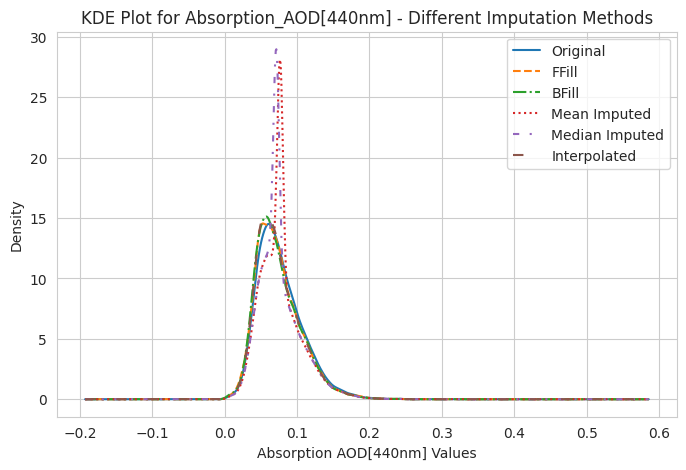

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot KDE for each method
aerosol["Absorption_AOD[440nm]"].plot.kde(label="Original", linestyle='solid')
aerosol["Absorption_AOD[440nm]_FFill"].plot.kde(label="FFill", linestyle='dashed')
aerosol["Absorption_AOD[440nm]_BFill"].plot.kde(label="BFill", linestyle='dashdot')
aerosol["Absorption_AOD[440nm]_Mean_Imputed"].plot.kde(label="Mean Imputed", linestyle='dotted')
aerosol["Absorption_AOD[440nm]_Median_Imputed"].plot.kde(label="Median Imputed", linestyle=(0, (3, 5, 1, 5)))
aerosol["Absorption_AOD[440nm]_Interpolated"].plot.kde(label="Interpolated", linestyle=(0, (5, 10)))

# Formatting
plt.title("KDE Plot for Absorption_AOD[440nm] - Different Imputation Methods")
plt.xlabel("Absorption AOD[440nm] Values")
plt.ylabel("Density")
plt.legend()
plt.show()


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set plot style
sns.set_style("whitegrid")

# Extract column for visualization
column = "Absorption_AOD[440nm]"

# Creating a DataFrame for different imputation methods
imputed_df = pd.DataFrame({
    "Original": aerosol['Absorption_AOD[440nm]'],
    "Ffill": aerosol['Absorption_AOD[440nm]_FFill'],
    "Bfill": aerosol['Absorption_AOD[440nm]_BFill'],
    "Mean": aerosol['Absorption_AOD[440nm]_Mean_Imputed'],
    "Median": aerosol['Absorption_AOD[440nm]_Median_Imputed'],  # Fixed typo (was repeating Mean)
    "Interpolated": aerosol["Absorption_AOD[440nm]_Interpolated"]
})



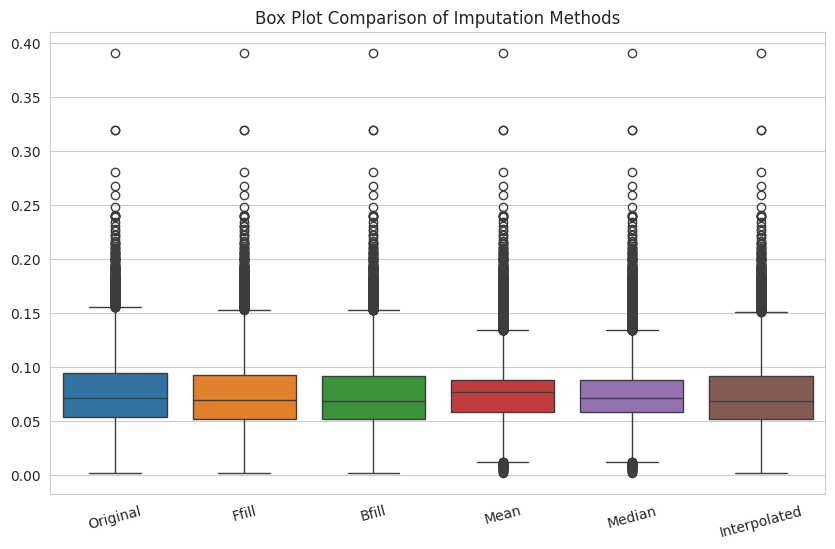

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `imputed_df` is already created
plt.figure(figsize=(10, 6))
sns.boxplot(data=imputed_df)
plt.title("Box Plot Comparison of Imputation Methods")
plt.xticks(rotation=15)
plt.show()


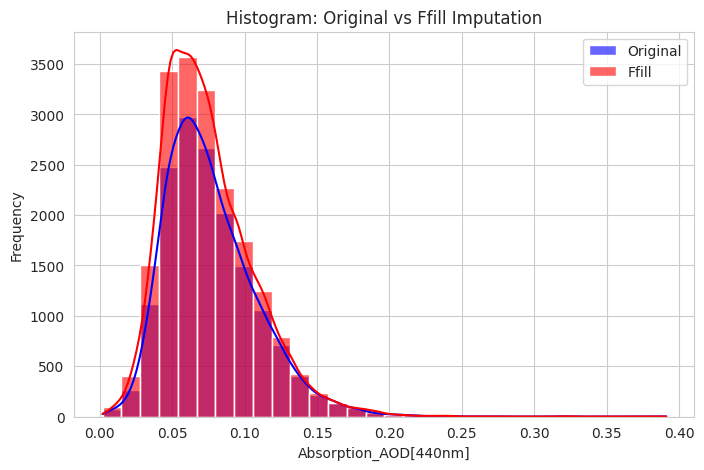

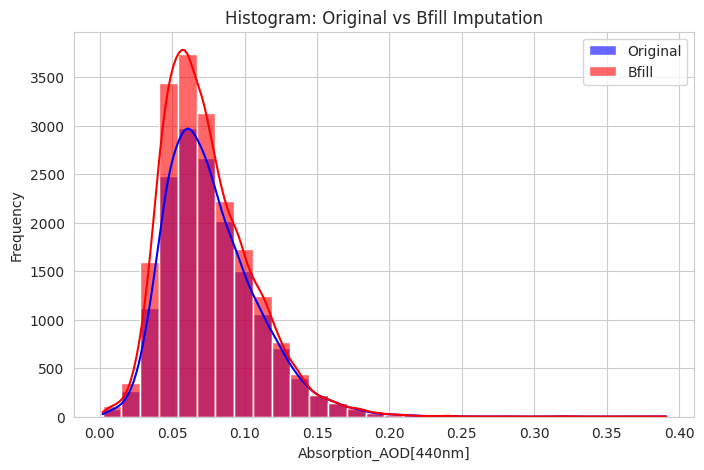

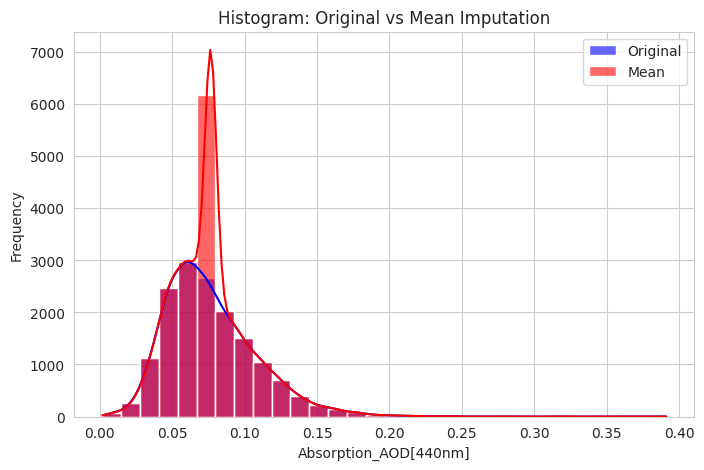

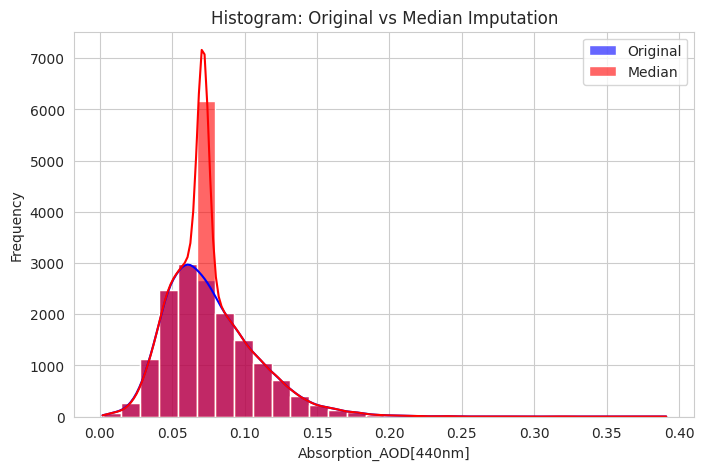

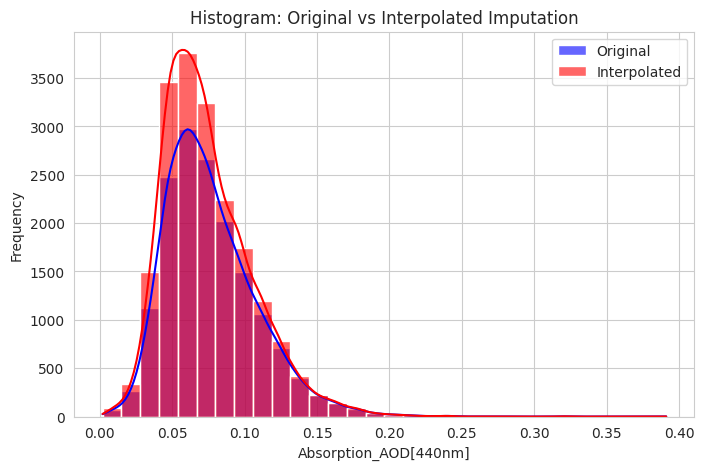

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# List of imputation methods (excluding Original)
methods = ["Ffill", "Bfill", "Mean", "Median", "Interpolated"]

# Create histograms overlaying each imputation method with the original
for method in methods:
    plt.figure(figsize=(8, 5))

    # Plot Original data
    sns.histplot(imputed_df["Original"], bins=30, kde=True, color="blue", label="Original", alpha=0.6)

    # Plot imputed data
    sns.histplot(imputed_df[method], bins=30, kde=True, color="red", label=method, alpha=0.6)

    plt.title(f"Histogram: Original vs {method} Imputation")
    plt.xlabel("Absorption_AOD[440nm]")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


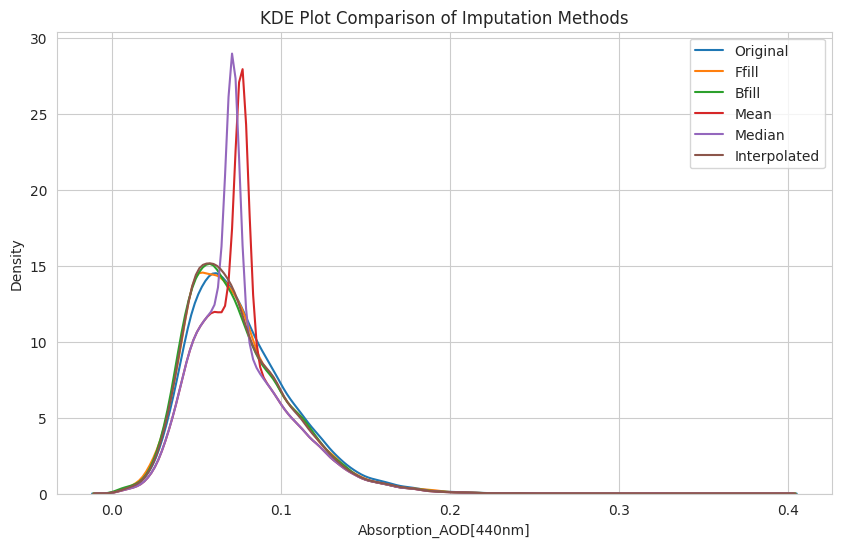

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
for col in imputed_df.columns:
    sns.kdeplot(imputed_df[col], label=col)

plt.legend()
plt.title("KDE Plot Comparison of Imputation Methods")
plt.xlabel("Absorption_AOD[440nm]")
plt.ylabel("Density")
plt.show()


In [112]:

aerosol["Single_Scattering_Albedo[675nm]_FFill"] = aerosol["Single_Scattering_Albedo[675nm]"].fillna(method="ffill")
aerosol["Single_Scattering_Albedo[675nm]_BFill"] = aerosol["Single_Scattering_Albedo[675nm]"].fillna(method="bfill")
aerosol["Single_Scattering_Albedo[675nm]_Mean_Imputed"] = aerosol["Single_Scattering_Albedo[675nm]"].fillna(aerosol["Single_Scattering_Albedo[675nm]"].mean())
aerosol["Single_Scattering_Albedo[675nm]_Median_Imputed"] = aerosol["Single_Scattering_Albedo[675nm]"].fillna(aerosol["Single_Scattering_Albedo[675nm]"].median())
aerosol["Single_Scattering_Albedo[675nm]_Interpolated"] = aerosol["Single_Scattering_Albedo[675nm]"].interpolate()


<ipython-input-112-fd70b1ebed24>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aerosol["Single_Scattering_Albedo[675nm]_FFill"] = aerosol["Single_Scattering_Albedo[675nm]"].fillna(method="ffill")
<ipython-input-112-fd70b1ebed24>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aerosol["Single_Scattering_Albedo[675nm]_BFill"] = aerosol["Single_Scattering_Albedo[675nm]"].fillna(method="bfill")


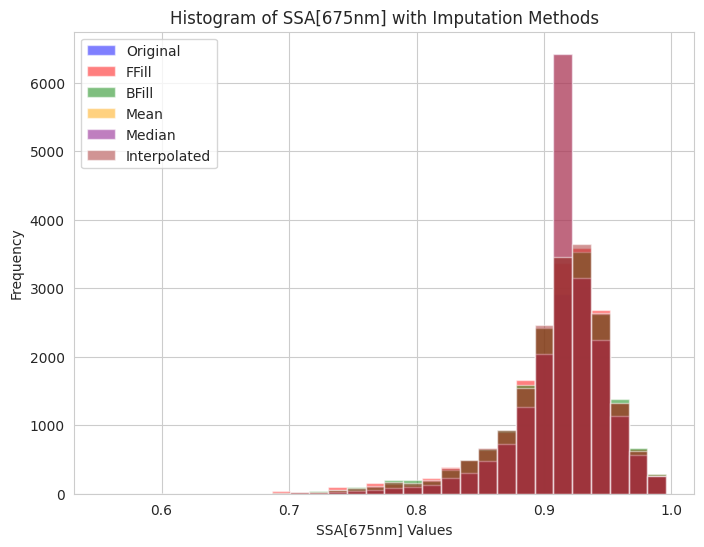

In [113]:


plt.figure(figsize=(8, 6))
plt.hist(aerosol["Single_Scattering_Albedo[675nm]"], bins=30, alpha=0.5, label="Original", color="blue")
plt.hist(aerosol["Single_Scattering_Albedo[675nm]_FFill"], bins=30, alpha=0.5, label="FFill", color="red")
plt.hist(aerosol["Single_Scattering_Albedo[675nm]_BFill"], bins=30, alpha=0.5, label="BFill", color="green")
plt.hist(aerosol["Single_Scattering_Albedo[675nm]_Mean_Imputed"], bins=30, alpha=0.5, label="Mean", color="orange")
plt.hist(aerosol["Single_Scattering_Albedo[675nm]_Median_Imputed"], bins=30, alpha=0.5, label="Median", color="purple")
plt.hist(aerosol["Single_Scattering_Albedo[675nm]_Interpolated"], bins=30, alpha=0.5, label="Interpolated", color="brown")

plt.xlabel("SSA[675nm] Values")
plt.ylabel("Frequency")
plt.title("Histogram of SSA[675nm] with Imputation Methods")
plt.legend()
plt.show()


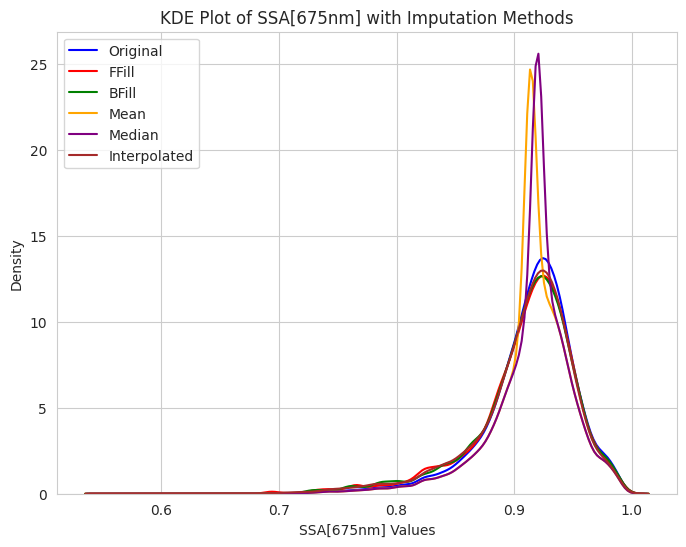

In [114]:

plt.figure(figsize=(8, 6))
sns.kdeplot(aerosol["Single_Scattering_Albedo[675nm]"], label="Original", color="blue")
sns.kdeplot(aerosol["Single_Scattering_Albedo[675nm]_FFill"], label="FFill", color="red")
sns.kdeplot(aerosol["Single_Scattering_Albedo[675nm]_BFill"], label="BFill", color="green")
sns.kdeplot(aerosol["Single_Scattering_Albedo[675nm]_Mean_Imputed"], label="Mean", color="orange")
sns.kdeplot(aerosol["Single_Scattering_Albedo[675nm]_Median_Imputed"], label="Median", color="purple")
sns.kdeplot(aerosol["Single_Scattering_Albedo[675nm]_Interpolated"], label="Interpolated", color="brown")

plt.xlabel("SSA[675nm] Values")
plt.ylabel("Density")
plt.title("KDE Plot of SSA[675nm] with Imputation Methods")
plt.legend()
plt.show()


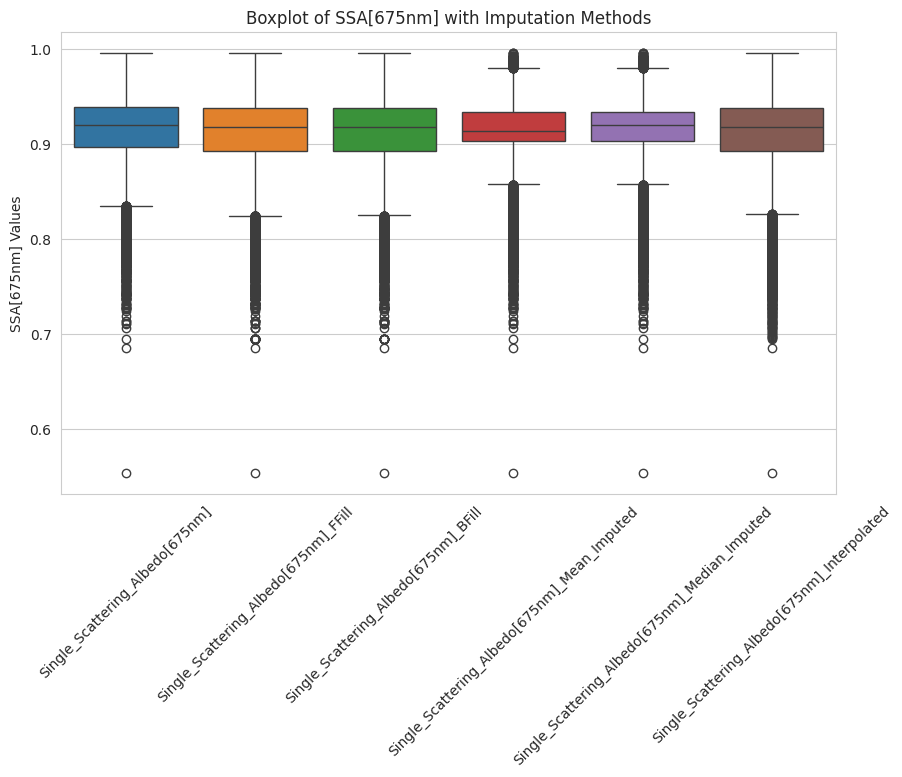

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aerosol[[
    "Single_Scattering_Albedo[675nm]",
    "Single_Scattering_Albedo[675nm]_FFill",
    "Single_Scattering_Albedo[675nm]_BFill",
    "Single_Scattering_Albedo[675nm]_Mean_Imputed",
    "Single_Scattering_Albedo[675nm]_Median_Imputed",
    "Single_Scattering_Albedo[675nm]_Interpolated"
]])

plt.xticks(rotation=45)
plt.title("Boxplot of SSA[675nm] with Imputation Methods")
plt.ylabel("SSA[675nm] Values")
plt.show()


In [116]:
ri_column = 'Refractive_Index-Real_Part[1020nm]'

# Imputation Methods
aerosol['RI_FFill'] = aerosol[ri_column].fillna(method='ffill')
aerosol['RI_BFill'] = aerosol[ri_column].fillna(method='bfill')
aerosol['RI_Mean_Imputed'] = aerosol[ri_column].fillna(aerosol[ri_column].mean())
aerosol['RI_Median_Imputed'] = aerosol[ri_column].fillna(aerosol[ri_column].median())
aerosol['RI_Interpolated'] = aerosol[ri_column].interpolate()

<ipython-input-116-e494444f1839>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aerosol['RI_FFill'] = aerosol[ri_column].fillna(method='ffill')
<ipython-input-116-e494444f1839>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aerosol['RI_BFill'] = aerosol[ri_column].fillna(method='bfill')


In [117]:
aerosol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19272 entries, 0 to 19271
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Site                                              19272 non-null  object 
 1   Date(dd:mm:yyyy)                                  19272 non-null  object 
 2   Time(hh:mm:ss)                                    19272 non-null  object 
 3   Day_of_Year                                       19272 non-null  int64  
 4   Day_of_Year(Fraction)                             19272 non-null  float64
 5   AOD_Extinction-Total[440nm]                       19272 non-null  float64
 6   AOD_Extinction-Total[675nm]                       19272 non-null  float64
 7   AOD_Extinction-Total[870nm]                       19272 non-null  float64
 8   AOD_Extinction-Total[1020nm]                      19272 non-null  float64
 9   AOD_Extinction-Fi

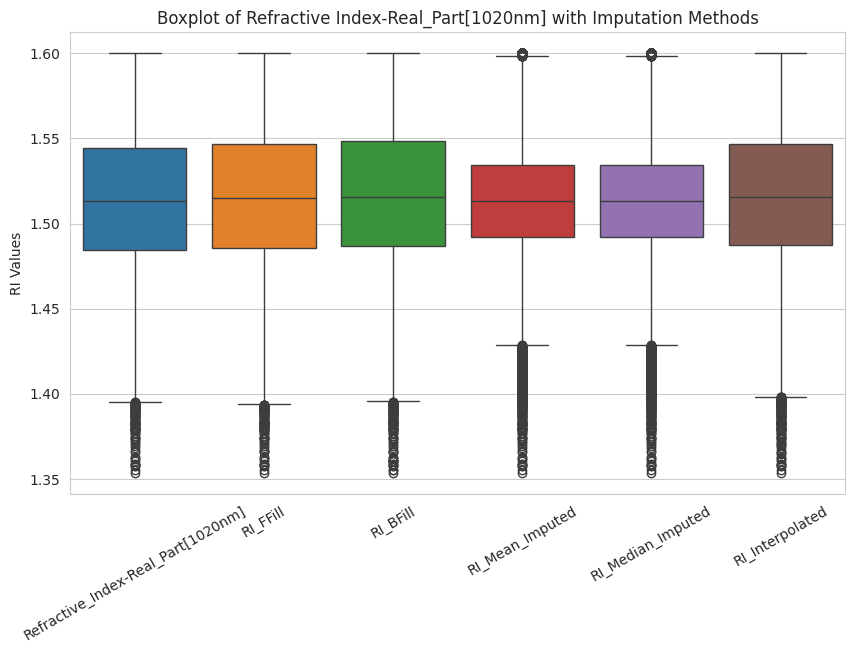

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aerosol[[ri_column, 'RI_FFill', 'RI_BFill', 'RI_Mean_Imputed', 'RI_Median_Imputed', 'RI_Interpolated']])
plt.xticks(rotation=30)
plt.title('Boxplot of Refractive Index-Real_Part[1020nm] with Imputation Methods')
plt.ylabel('RI Values')
plt.show()


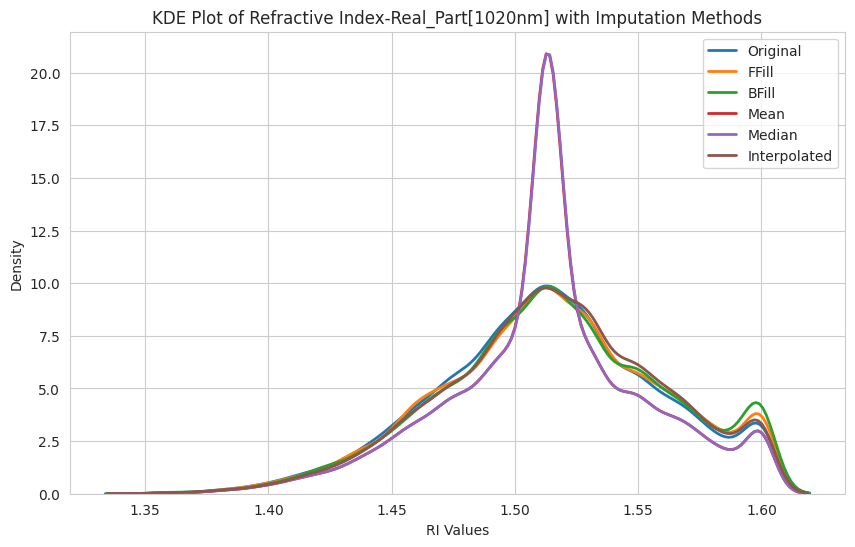

In [119]:
plt.figure(figsize=(10, 6))
sns.kdeplot(aerosol[ri_column].dropna(), label='Original', lw=2)
sns.kdeplot(aerosol['RI_FFill'], label='FFill', lw=2)
sns.kdeplot(aerosol['RI_BFill'], label='BFill', lw=2)
sns.kdeplot(aerosol['RI_Mean_Imputed'], label='Mean', lw=2)
sns.kdeplot(aerosol['RI_Median_Imputed'], label='Median', lw=2)
sns.kdeplot(aerosol['RI_Interpolated'], label='Interpolated', lw=2)
plt.legend()
plt.title('KDE Plot of Refractive Index-Real_Part[1020nm] with Imputation Methods')
plt.xlabel('RI Values')
plt.ylabel('Density')
plt.show()

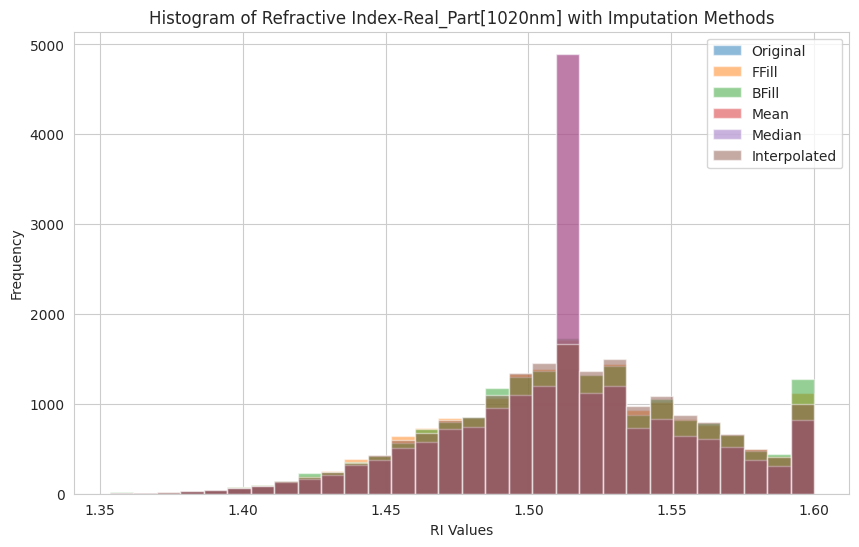

In [120]:
plt.figure(figsize=(10, 6))
plt.hist(aerosol[ri_column].dropna(), bins=30, alpha=0.5, label='Original')
plt.hist(aerosol['RI_FFill'], bins=30, alpha=0.5, label='FFill')
plt.hist(aerosol['RI_BFill'], bins=30, alpha=0.5, label='BFill')
plt.hist(aerosol['RI_Mean_Imputed'], bins=30, alpha=0.5, label='Mean')
plt.hist(aerosol['RI_Median_Imputed'], bins=30, alpha=0.5, label='Median')
plt.hist(aerosol['RI_Interpolated'], bins=30, alpha=0.5, label='Interpolated')
plt.legend()
plt.title('Histogram of Refractive Index-Real_Part[1020nm] with Imputation Methods')
plt.xlabel('RI Values')
plt.ylabel('Frequency')
plt.show()

In [121]:

columns = [
    "Refractive_Index-Real_Part[1020nm]", "RI_FFill", "RI_BFill",
    "RI_Mean_Imputed", "RI_Median_Imputed", "RI_Interpolated"
]

variances = {col: np.var(aerosol[col], ddof=1) for col in columns}

for col, var in variances.items():
    print(f"Variance of {col}: {var}")


Variance of Refractive_Index-Real_Part[1020nm]: 0.002037606232806074
Variance of RI_FFill: 0.002096462273408635
Variance of RI_BFill: 0.0021160756691175242
Variance of RI_Mean_Imputed: 0.0016671131478726436
Variance of RI_Median_Imputed: 0.0016671160597124183
Variance of RI_Interpolated: 0.001995952162354485


Mean & Median : This method generated sharp distortions in kde graph.

FFill & BFill: Effective for time-dependent data but fail when missing values appear in continuous blocks, leading to misleading patterns.

Interpolation: Preserves natural trends, avoids sharp distortions, and effectively handles grouped missing values.

Variance Consistency: The variance difference is minimal with interpolation, ensuring that the imputed values remain statistically closer to the original distribution.

In [126]:
cols_to_drop = ["Single_Scattering_Albedo[440nm]_Mean_Imputed", "Single_Scattering_Albedo[440nm]_Median_Imputed",
                "Absorption_AOD[440nm]_Mean_Imputed", "Absorption_AOD[440nm]_Median_Imputed",
                "Refractive_Index-Real_Part[440nm]_Mean_Imputed", "Refractive_Index-Real_Part[440nm]_Median_Imputed",
                "Absorption_AOD[440nm]_FFill", "Absorption_AOD[440nm]_BFill",
                "Single_Scattering_Albedo[675nm]_FFill", "Single_Scattering_Albedo[675nm]_BFill",
                "Single_Scattering_Albedo[675nm]_Mean_Imputed", "Single_Scattering_Albedo[675nm]_Median_Imputed",
                "RI_FFill", "RI_BFill", "RI_Mean_Imputed", "RI_Median_Imputed",
                "Absorption_AOD[440nm]_Interpolated", "Single_Scattering_Albedo[675nm]_Interpolated", "RI_Interpolated"]
aerosol.drop(columns=cols_to_drop, inplace=True)


In [127]:
aerosol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19272 entries, 0 to 19271
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Site                                          19272 non-null  object 
 1   Date(dd:mm:yyyy)                              19272 non-null  object 
 2   Time(hh:mm:ss)                                19272 non-null  object 
 3   Day_of_Year                                   19272 non-null  int64  
 4   Day_of_Year(Fraction)                         19272 non-null  float64
 5   AOD_Extinction-Total[440nm]                   19272 non-null  float64
 6   AOD_Extinction-Total[675nm]                   19272 non-null  float64
 7   AOD_Extinction-Total[870nm]                   19272 non-null  float64
 8   AOD_Extinction-Total[1020nm]                  19272 non-null  float64
 9   AOD_Extinction-Fine[440nm]                    19272 non-null 

In [129]:
aerosol.isnull().sum()

,0
Site,0
Date(dd:mm:yyyy),0
Time(hh:mm:ss),0
Day_of_Year,0
Day_of_Year(Fraction),0
AOD_Extinction-Total[440nm],0
AOD_Extinction-Total[675nm],0
AOD_Extinction-Total[870nm],0
AOD_Extinction-Total[1020nm],0
AOD_Extinction-Fine[440nm],0


In [131]:
cols_to_interpolate = ["Single_Scattering_Albedo[440nm]", "Single_Scattering_Albedo[675nm]",
                        "Single_Scattering_Albedo[870nm]", "Single_Scattering_Albedo[1020nm]",
                        "Absorption_AOD[440nm]", "Absorption_AOD[675nm]", "Absorption_AOD[870nm]",
                        "Absorption_AOD[1020nm]", "Absorption_Angstrom_Exponent_440-870nm",
                        "Refractive_Index-Real_Part[440nm]", "Refractive_Index-Real_Part[675nm]",
                        "Refractive_Index-Real_Part[870nm]", "Refractive_Index-Real_Part[1020nm]",
                        "Refractive_Index-Imaginary_Part[440nm]", "Refractive_Index-Imaginary_Part[675nm]",
                        "Refractive_Index-Imaginary_Part[870nm]", "Refractive_Index-Imaginary_Part[1020nm]"]


aerosol[cols_to_interpolate] = aerosol[cols_to_interpolate].interpolate(method='linear')



In [133]:
aerosol.isnull().sum()

,0
Site,0
Date(dd:mm:yyyy),0
Time(hh:mm:ss),0
Day_of_Year,0
Day_of_Year(Fraction),0
AOD_Extinction-Total[440nm],0
AOD_Extinction-Total[675nm],0
AOD_Extinction-Total[870nm],0
AOD_Extinction-Total[1020nm],0
AOD_Extinction-Fine[440nm],0


**All missing values in numerical columns have been filled using interpolation.**



# Add calculated columns using Dubovik and King’s formulae and compute the differences with the provided data.

In [141]:
# adding calculated data cols according to Dubovik and King provided formulae and differnce with provided data
# Calculate EAE
aerosol["Calculated_EAE"] = -np.log(aerosol["AOD_Extinction-Total[440nm]"] / aerosol["AOD_Extinction-Total[870nm]"]) / np.log(440 / 870)

# Difference in EAE
aerosol["EAE_Difference"] = aerosol["Extinction_Angstrom_Exponent_440-870nm-Total"] - aerosol["Calculated_EAE"]

# Calculate AAOD and their differences for different wavelengths
for wl in ['440nm', '675nm', '870nm', '1020nm']:
    aerosol[f'Calculated_AAOD[{wl}]'] = aerosol[f'AOD_Extinction-Total[{wl}]'] * (1 - aerosol[f'Single_Scattering_Albedo[{wl}]'])
    aerosol[f'AAOD_Difference[{wl}]'] = aerosol[f'Absorption_AOD[{wl}]'] - aerosol[f'Calculated_AAOD[{wl}]']

# Calculate AAE
aerosol["Calculated_AAE"] = (-np.log(aerosol["Calculated_AAOD[870nm]"]) + np.log(aerosol["Calculated_AAOD[440nm]"])) / np.log(440 / 870)

# Difference in AAE
aerosol["AAE_Difference"] = aerosol["Absorption_Angstrom_Exponent_440-870nm"] - aerosol["Calculated_AAE"]

In [142]:
aerosol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19272 entries, 0 to 19271
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Site                                          19272 non-null  object 
 1   Date(dd:mm:yyyy)                              19272 non-null  object 
 2   Time(hh:mm:ss)                                19272 non-null  object 
 3   Day_of_Year                                   19272 non-null  int64  
 4   Day_of_Year(Fraction)                         19272 non-null  float64
 5   AOD_Extinction-Total[440nm]                   19272 non-null  float64
 6   AOD_Extinction-Total[675nm]                   19272 non-null  float64
 7   AOD_Extinction-Total[870nm]                   19272 non-null  float64
 8   AOD_Extinction-Total[1020nm]                  19272 non-null  float64
 9   AOD_Extinction-Fine[440nm]                    19272 non-null 

In [143]:
aerosol.isnull().sum()

,0
Site,0
Date(dd:mm:yyyy),0
Time(hh:mm:ss),0
Day_of_Year,0
Day_of_Year(Fraction),0
AOD_Extinction-Total[440nm],0
AOD_Extinction-Total[675nm],0
AOD_Extinction-Total[870nm],0
AOD_Extinction-Total[1020nm],0
AOD_Extinction-Fine[440nm],0


# **Standardization and Normalization of Data**

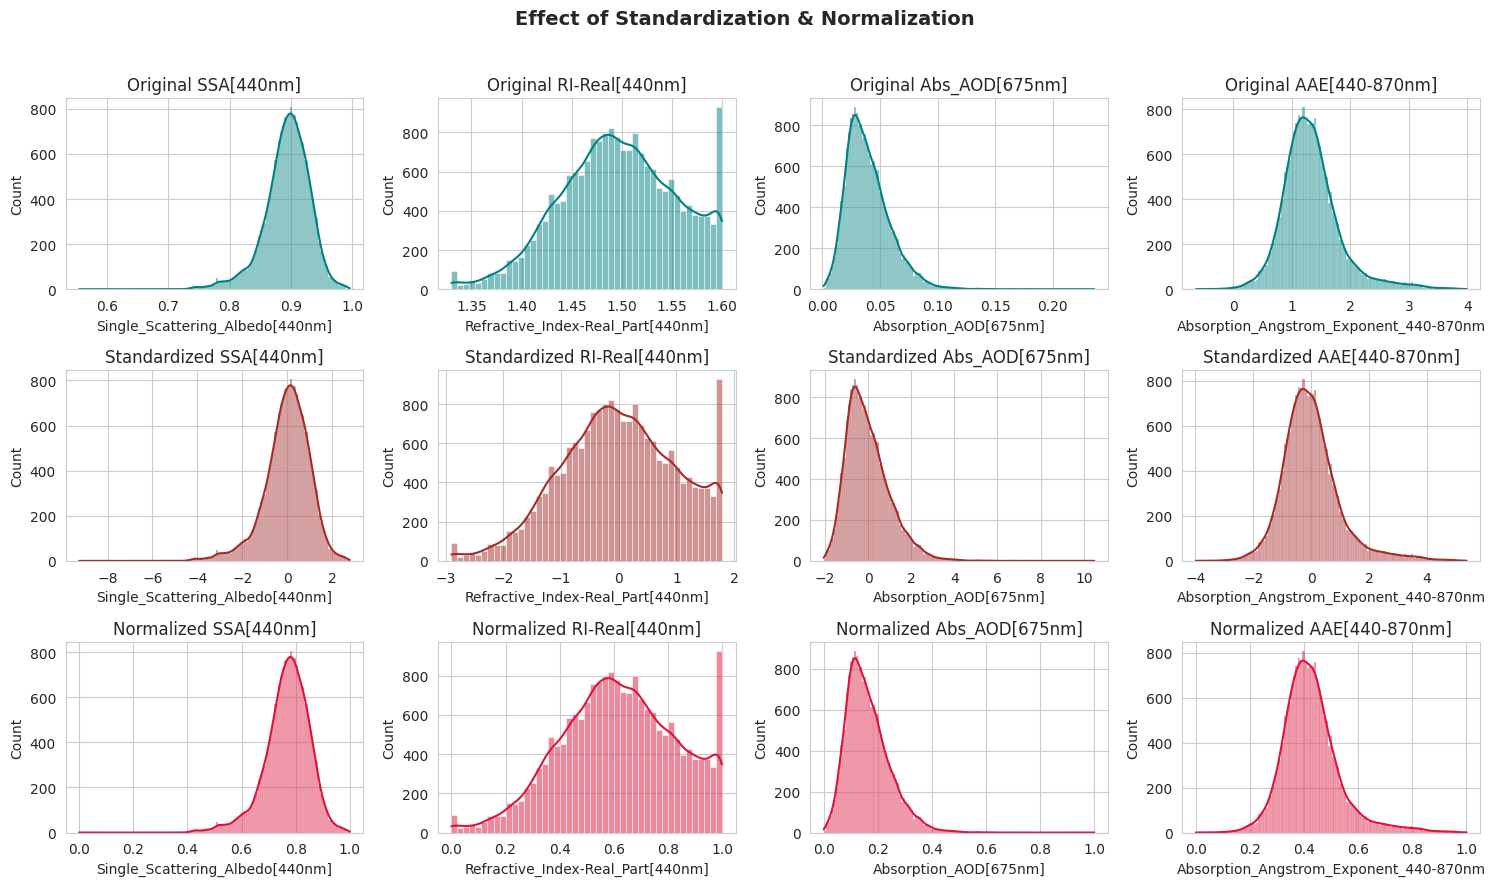

In [182]:


# Select relevant numerical columns
selected_cols = [
    "Single_Scattering_Albedo[440nm]",
    "Refractive_Index-Real_Part[440nm]",
    "Absorption_AOD[675nm]",
    "Absorption_Angstrom_Exponent_440-870nm"
]

# Standardization (Z-score Scaling)
scaler_std = StandardScaler()
aerosol_std = aerosol.copy()
aerosol_std[selected_cols] = scaler_std.fit_transform(aerosol[selected_cols])

# Normalization (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
aerosol_minmax = aerosol.copy()
aerosol_minmax[selected_cols] = scaler_minmax.fit_transform(aerosol[selected_cols])

# Plot Before and After Scaling
fig, axes = plt.subplots(3, len(selected_cols), figsize=(15, 9))
fig.suptitle("Effect of Standardization & Normalization", fontsize=14, fontweight="bold")

short_titles = ["SSA[440nm]", "RI-Real[440nm]", "Abs_AOD[675nm]", "AAE[440-870nm]"]

for idx, (col, short_col) in enumerate(zip(selected_cols, short_titles)):
    # Original Data
    sns.histplot(aerosol[col], kde=True, ax=axes[0, idx], color="teal")
    axes[0, idx].set_title(f"Original {short_col}")

    # Standardized Data
    sns.histplot(aerosol_std[col], kde=True, ax=axes[1, idx], color="brown")
    axes[1, idx].set_title(f"Standardized {short_col}")

    # Normalized Data
    sns.histplot(aerosol_minmax[col], kde=True, ax=axes[2, idx], color="crimson")
    axes[2, idx].set_title(f"Normalized {short_col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



# **Handling Outliers**

In [183]:
aerosol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19272 entries, 0 to 19271
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Site                                          19272 non-null  object 
 1   Date(dd:mm:yyyy)                              19272 non-null  object 
 2   Time(hh:mm:ss)                                19272 non-null  object 
 3   Day_of_Year                                   19272 non-null  int64  
 4   Day_of_Year(Fraction)                         19272 non-null  float64
 5   AOD_Extinction-Total[440nm]                   19272 non-null  float64
 6   AOD_Extinction-Total[675nm]                   19272 non-null  float64
 7   AOD_Extinction-Total[870nm]                   19272 non-null  float64
 8   AOD_Extinction-Total[1020nm]                  19272 non-null  float64
 9   AOD_Extinction-Fine[440nm]                    19272 non-null 

In [184]:
from scipy.stats import skew

skew_values = aerosol.select_dtypes(include=['float64', 'int64']).apply(skew)
print(skew_values)

Day_of_Year                                     0.312365
Day_of_Year(Fraction)                           0.312473
AOD_Extinction-Total[440nm]                     1.445739
AOD_Extinction-Total[675nm]                     1.572409
AOD_Extinction-Total[870nm]                     1.939294
AOD_Extinction-Total[1020nm]                    2.317333
AOD_Extinction-Fine[440nm]                      1.670664
AOD_Extinction-Fine[675nm]                      1.968550
AOD_Extinction-Fine[870nm]                      2.145245
AOD_Extinction-Fine[1020nm]                     2.287594
AOD_Extinction-Coarse[440nm]                    2.823512
AOD_Extinction-Coarse[675nm]                    2.829182
AOD_Extinction-Coarse[870nm]                    2.818490
AOD_Extinction-Coarse[1020nm]                   2.793055
Extinction_Angstrom_Exponent_440-870nm-Total   -0.734705
Single_Scattering_Albedo[440nm]                -0.848558
Single_Scattering_Albedo[675nm]                -1.370140
Single_Scattering_Albedo[870nm]

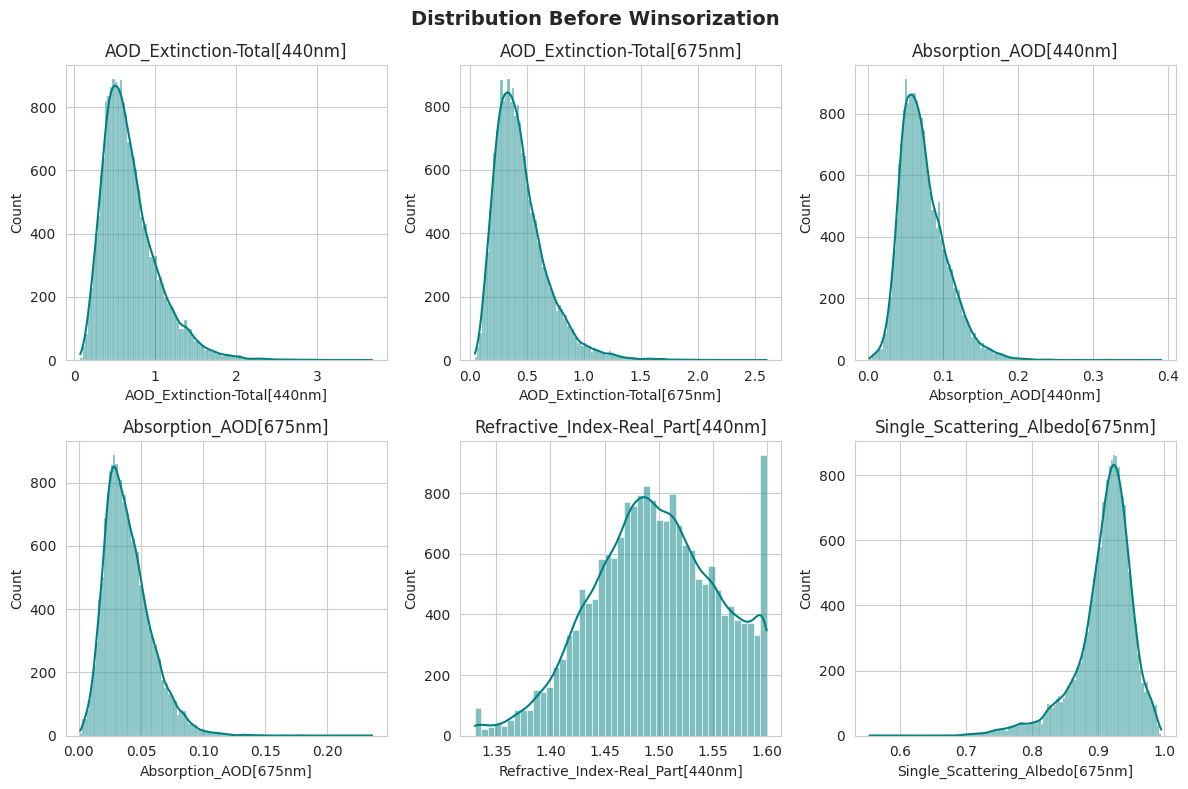

In [187]:
#
sample_cols = [
    "AOD_Extinction-Total[440nm]", "AOD_Extinction-Total[675nm]",
    "Absorption_AOD[440nm]", "Absorption_AOD[675nm]",
    "Refractive_Index-Real_Part[440nm]", "Single_Scattering_Albedo[675nm]"
]


plt.figure(figsize=(12, 8))
plt.suptitle("Distribution Before Winsorization", fontsize=14, fontweight="bold")

for i, col in enumerate(sample_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(aerosol[col], kde=True, color="teal")
    plt.title(col)

plt.tight_layout()
plt.show()



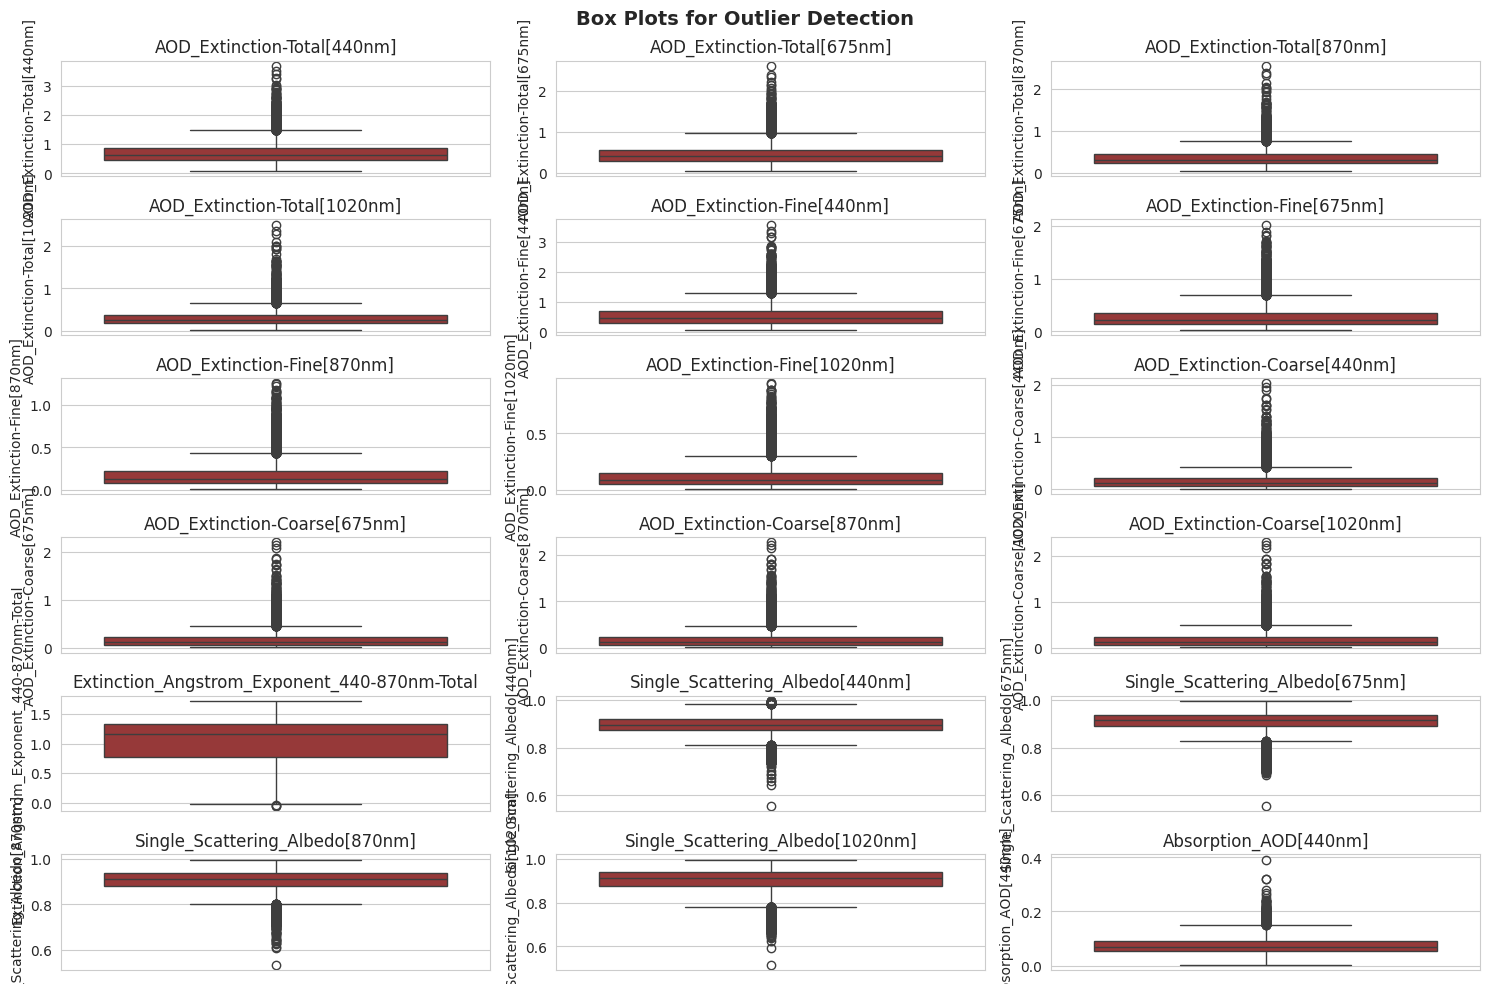

In [191]:

num_cols = aerosol.select_dtypes(include=['float64', 'int64']).columns.drop(["Day_of_Year", "Day_of_Year(Fraction)"])


plt.figure(figsize=(15, 10))
plt.suptitle("Box Plots for Outlier Detection", fontsize=14, fontweight="bold")

for i, col in enumerate(num_cols[:18], 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=aerosol[col], color="brown")
    plt.title(col)

plt.tight_layout()
plt.show()



In [194]:
# Copy original data to avoid modifying it
aerosol_iqr = aerosol.copy()

# Define numerical columns (excluding "Day_of_Year")
num_cols = aerosol.select_dtypes(include=['float64', 'int64']).columns.drop(["Day_of_Year", "Day_of_Year(Fraction)"])

# Apply IQR method for outlier handling
for col in num_cols:
    Q1 = aerosol[col].quantile(0.25)  # 25th percentile
    Q3 = aerosol[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    aerosol_iqr[col] = aerosol[col].clip(lower=lower_bound, upper=upper_bound)



<ipython-input-198-c8fb09eaf42a>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(short_labels, rotation=20, fontsize=12)  # Shortened names
<ipython-input-198-c8fb09eaf42a>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(short_labels, rotation=20, fontsize=12)  # Shortened names


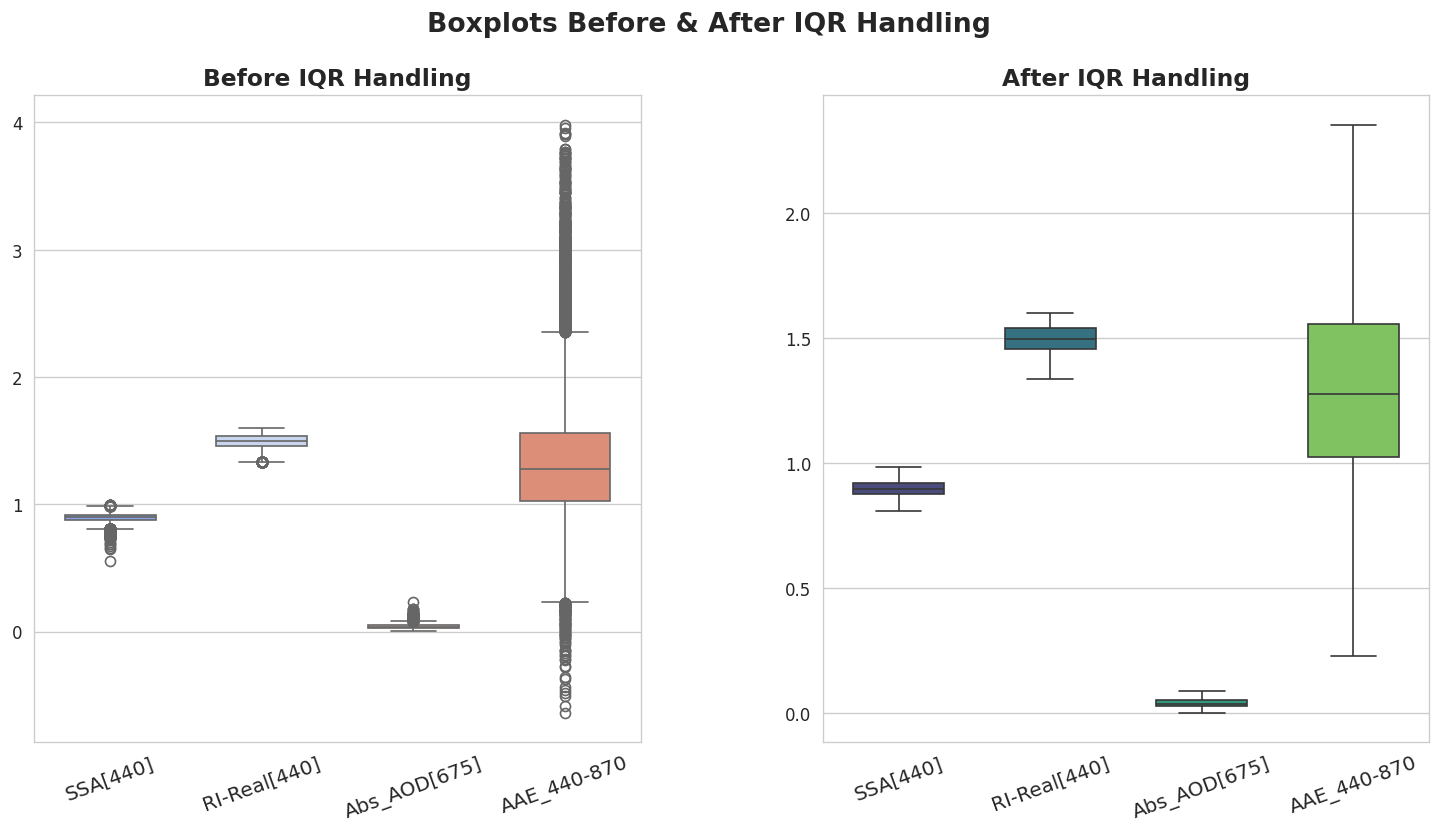

In [198]:


# Shortened column names for better readability
short_labels = ["SSA[440]", "RI-Real[440]", "Abs_AOD[675]", "AAE_440-870"]

# Increase figure size for better visibility
fig, axes = plt.subplots(1, 2, figsize=(15, 7), dpi=120)
fig.suptitle("Boxplots Before & After IQR Handling", fontsize=16, fontweight="bold")

# Before IQR Handling
sns.boxplot(data=aerosol[selected_cols], ax=axes[0], palette="coolwarm", width=0.6, showfliers=True)
axes[0].set_title("Before IQR Handling", fontsize=14, fontweight="bold")
axes[0].set_xticklabels(short_labels, rotation=20, fontsize=12)  # Shortened names

# After IQR Handling
sns.boxplot(data=aerosol_iqr[selected_cols], ax=axes[1], palette="viridis", width=0.6, showfliers=True)
axes[1].set_title("After IQR Handling", fontsize=14, fontweight="bold")
axes[1].set_xticklabels(short_labels, rotation=20, fontsize=12)  # Shortened names

# Adjust layout to avoid overlapping
plt.subplots_adjust(wspace=0.3)
plt.show()


In [201]:
aerosol = aerosol_winsor.copy()


# **Frequency Distribution of Aerosol Optical Properties Fig 2**

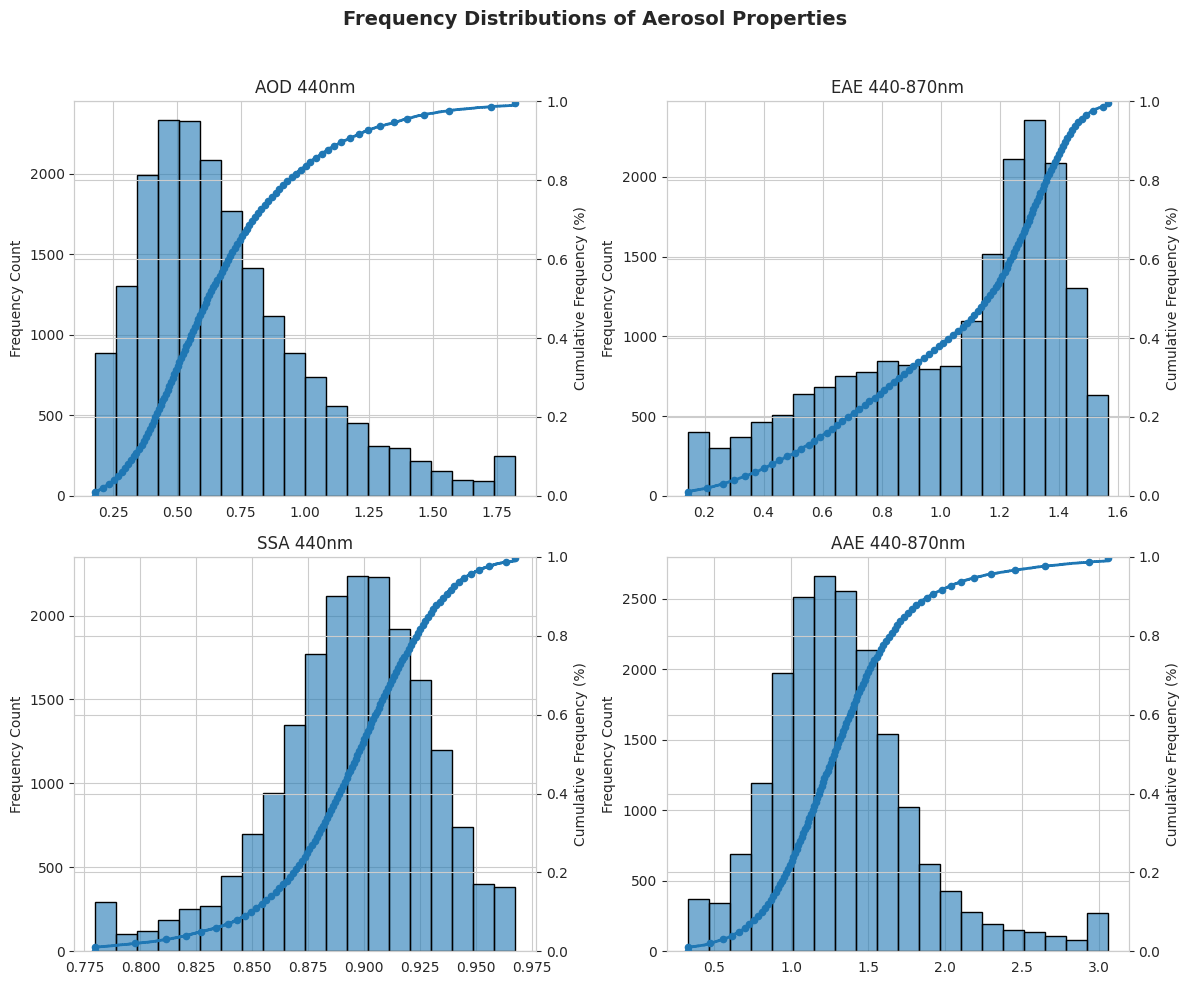

In [220]:

# Set style
sns.set_style("whitegrid")

# Define the columns for plotting
columns = {
    "AOD 440nm": "AOD_Extinction-Total[440nm]",
    "EAE 440-870nm": "Extinction_Angstrom_Exponent_440-870nm-Total",
    "SSA 440nm": "Single_Scattering_Albedo[440nm]",
    "AAE 440-870nm": "Absorption_Angstrom_Exponent_440-870nm"
}

# Define figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Frequency Distributions of Aerosol Properties", fontsize=14, fontweight="bold")

# Iterate over columns and axes
for ax, (title, col) in zip(axes.flatten(), columns.items()):
    # Plot histogram with increased bins
    sns.histplot(aerosol[col], bins=20, kde=False, edgecolor="black", alpha=0.6, ax=ax)

    # Overlay cumulative distribution with spaced dots
    ax2 = ax.twinx()
    sorted_data = np.sort(aerosol[col].dropna())  # Sort values & drop NaN
    spacing_factor = max(1, len(sorted_data) // 100)  # Adjust spacing dynamically
    sns.ecdfplot(sorted_data, ax=ax2, linewidth=2)  # Smooth ECDF
    ax2.scatter(sorted_data[::spacing_factor], np.linspace(0, 1, len(sorted_data))[::spacing_factor], s=20)  # Adds spaced dots

    # Formatting
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Frequency Count")
    ax2.set_ylabel("Cumulative Frequency (%)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
